# 15-388 tutorial: an introduction to Monte Carlo methods

Monte Carlo methods are a broad class of algorithms that rely on repeated random sampling to obtain numerical results. They are mainly used in three problem classes: optimization, numerical integration, and generating draws from probability distributions. This tutorial will start with a few examples of how Monte Carlo methods are applied in scientific computing, and focus on using Monte Carlo methods to sample from probability distributions. 

In [1]:
# import necessary things before we start
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## Background
Before we start, here are some useful things to know about:

#### Random variable
A random variable (usually written $X$) is a variable whose possible values are numerical outcomes of a random phenomenon. We will denote the set of values that a random variable can take by $S$. 

A discrete random variable $X$ is one which may take on only a countable number of distinct values. The expectation of it can be computed by $E(g(X)) = \sum_{x \in S} g(x) \cdot P(X = x)$, where $P(X = x)$ denotes the probability that $X = x$, for any function g. Note $\sum_{x \in S} P(X = x) = 1$.

A continuous random variable $X$ is one which takes an uncountably infinite number of possible values. The expectation of it can be computed by $E(g(X)) = \int_{-\infty}^{\infty} g(x) \cdot f(x) dx$, where $f(x)$ denotes the probability density function of the distribution, for any function g. Note $\int_{a}^{b} f(x) dx = P(a \leq X \leq b)$.

#### Weak law of large numbers
For random variables $X_1, ..., X_n \sim X$ (having the same distribution as $X$) that are independent and identically distributed, $\frac{1}{n} \sum_{i = 1}^{n} X_i \to E(X)$ as $n \to \infty$. 

#### Some common distributions that will be used later:
#### $U(a, b)$
We will denote the uniform distribution on the interval [a, b] by U(a, b). This is a continuous distribution with probability density function $f(x) = \frac{1}{b-a}, a < x < b$; and $0$, otherwise. 

#### $Exp(1)$
We will denote the exponential distribution with mean 1 by Exp(1). This is a continuous distribution with probability density function $f(x) = e^{-x}$ for $x \geq 0$. 

#### $N(0, 1)$
We will denote the normal distribution with mean 0 and standard deviation 1 by N(0, 1). This is a continuous distribution with probability density function $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ for $x \in \mathbb{R}$. 

## Examples: using Monte Carlo methods for estimation and numerical integration
The following are examples of how Monte Carlo methods are used for estimating $\pi$ and computing integrals. 

### Example 1: using Monte Carlo to estimate $\pi$
The goal is to estimate $\pi$ using monte carlo. We first notice that the area of the unit circle is exactly $\pi$, and the area of the square that bounds the unit circle is 4. Therefore, if we randomly select a point from the boundary square, the probability that the point lies in the circle is $\pi/4$. If we repeatedly uniformly sample from the square, this probability can be estimated by: number of points in the circle/ total number of selected points, and multiplying this value by 4 will give us an estimation of $\pi$. 

In general, increasing the sample size $n$ results in more accurate estimations of $\pi$. The sample code for this process is as follows: 

In [29]:
# n > 0
def mc_pi(n):
    ns = 0 # number of successes
    for i in range(n):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 < 1: # falls in the unit circle
            ns += 1
    return 4 * ns/n

print(mc_pi(10))
print(mc_pi(1000))
print(mc_pi(100000))

1.6
3.076
3.13392


### Example 2: using Monte Carlo to compute integration
How might we go about estimating the integral of some function $g(x)$ over [0, 1], if directly computing an antiderivative is difficult? One approach is to sample $X_1, ..., X_n \sim U(0, 1)$, and compute $\frac{1}{n} \sum_{i = 1}^{n} g(X_i)$ as an estimate. By the weak law of large numbers, $\frac{1}{n} \sum_{i = 1}^{n} g(X_i) \to E(g(X)) = \int_{-\infty}^{\infty} g(x) \cdot f(x) dx = \int_{0}^{1} g(x) \cdot 1 dx = \int_{0}^{1} g(x) dx$, since $f(x) = 1, x \in (0, 1); f(x) = 0, $otherwise is the probability density function of U(0, 1). Therefore, $\frac{1}{n} \sum_{i = 1}^{n} g(X_i)$ is a valid estimate for $\int_{0}^{1} g(x) dx$. 

We will take $g(x) = sin(x^2)$ for example. By Wolfram Alpha, the value of $\int_{0}^{1} sin(x^2) dx = \sqrt(\pi/2) \approx 0.31$, so hopefully this estimation gets closer to $0.31$ as we increase the sample size. The sample code for the above approach is as follows:

In [3]:
# n > 0
def mc_int(n):
    x = np.random.rand(1, n)
    r = np.sin(x**2)
    return np.sum(r)/n

print(mc_int(10))
print(mc_int(1000))
print(mc_int(1000000))

0.23596714234
0.308067263776
0.310416289517


## Using Monte Carlo methods for sampling from probability distributions
From now on we will focus on using Monte Carlo to sample from probability distributions. The topics covered are rejection sampling and slice sampling. 

### Rejection sampling
What can we do if we want to sample from a continuous distribution $X$ with probability density function $f(x)$, given that we know how to sample from another continuous distribution with known density $g(x)$, and that $f(x) \leq c \cdot g(x)$ for some $c \in \mathbb{R}$ and all $x \in \mathbb{R}$ (see the image below)?

The algorithm for rejection sampling to sample from $X$ is as follows: 

(1) Sample $x'$ from $Y$

(2) Compute $v = \frac{f(x')}{c \cdot g(x')}$

(3) Sample $u$ from $U(0, 1)$

(4) If $u < v$, accept $x'$, else reject $x'$ and go back to (1)

There is a formal proof of correctness for this algorithm that we will not see in this tutorial, but the idea is: sampling from $Y$ is similar to randomly selecting a point from the area under the curve $g(x)$, so accepting any $x'$ with probability $\frac{f(x')}{c \cdot g(x')}$ will be the same as randomly selecting a point from the area under the curve $f(x)$, which gives us a way to sample from $X$. 

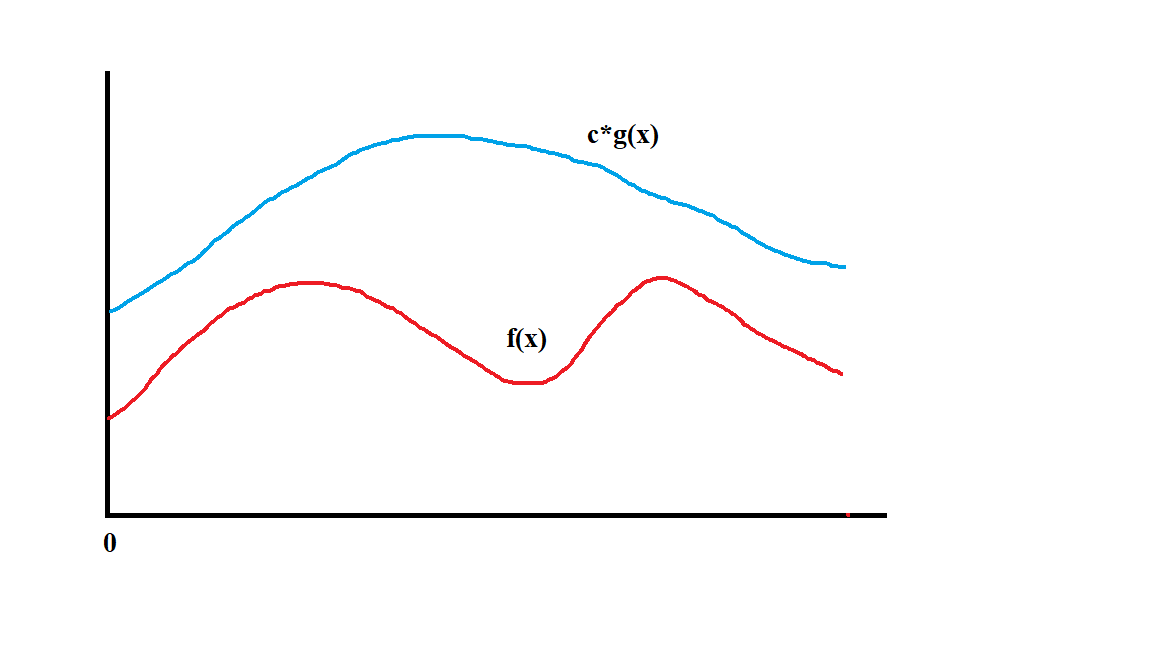

In [4]:
Image(filename = "rejection.png", width=500, height=500)

The following is a somewhat artificial example just for illustrating how rejection sampling works. We consider $X$ with density function $f(x) = 2 \cdot x$ for $x \in [0, 1]$, and $Y \sim U(0, 1)$ (Y is uniformly distributed on $[0, 1]$). It's easy to see that letting $c = 2$ gives $f(x) \leq c \cdot g(x)$. 

We will generate a normalized frequency histogram of samples we draw using rejection sampling. Then, we will compare the histogram to the graph of $f(x)$ to check that it's indeed an approximation of $X$. The code is as follows: 

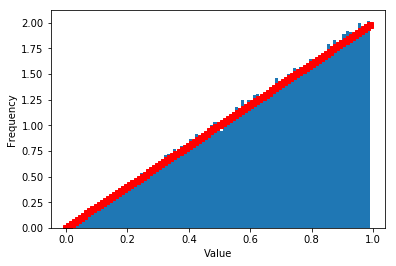

In [5]:
def mc_eg(n):
    l = []
    c = 2
    i = 0
    while i < n:
        z = np.random.uniform(0, 1) # sampled from Y
        fz = 2*z # f(z)
        gz = 1 # g(z)
        u = np.random.uniform(0, 1)
        if u < fz/(c*gz): # accept with this probability
            l.append(z)
            i += 1
    t = np.arange(0, 1, 0.01) # generate values from 0 to 1 with spacing 0.01
    plt.plot(t, 2*t, "rs") # plot f(values from above)
    plt.hist(l, bins = t, normed = True) # need to normalize to make sure the "integral" over the range is 1
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

mc_eg(100000) # generate and plot 100000 samples

Now consider the following question: how can we sample from $N(0, 1)$ if we know how to sample from $U(0, 1)$, given that we can conviniently generate samples from $Exp(1)$ using $U(0, 1)$? 

Let's first generate $Exp(1)$. This can be done using inverse transform sampling, which is very commonly used for distributions with a cumulative density function (cdf) that has an inverse. We will generate the same histogram and plot the density for $Exp(1)$. The code is as follows:

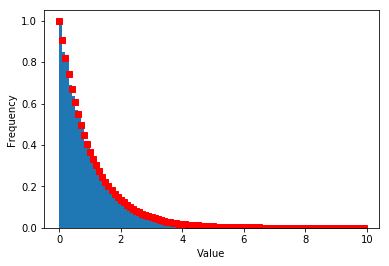

In [6]:
# sampling from Exp(1) using inverse transform sampling

def exp(x):
    return np.exp(-x) # compute the exponential pdf at x

def cexp_inv(x):
    return -np.log(1-x) # compute the inverse of the exponential cdf at x

def mc_exp(n):
    l = []
    for i in range(n):
        y = np.random.uniform(0, 1) # generate y from U(0, 1)
        x = cexp_inv(y) # compute cdf value at y
        l.append(x)
    t = np.arange(0, 10, 0.1) # generate values from 0 to 10 with spacing 0.1
    plt.plot(t, exp(t), "rs") # draw exponential pdf(values) from above
    plt.hist(l, bins = t, normed = True) # generate normalized histogram
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

mc_exp(10000)

Now we will use $Exp(1)$ to sample from $N(0, 1)$. The density of $Exp(1)$ is over $[0, \infty)$ while the density of $N(0, 1)$ is over $(-\infty, \infty)$, but since $N(0, 1)$ is symmetric, every time we get a sample $x'$ that passes the $f(x') \leq c \cdot g(x')$ test, we can accept $x'$ with probability 0.5 and accept $-x'$ with probability 0.5 to approximate $N(0, 1)$. 

In this example, $X \sim N(0, 1)$ with density $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ for $x \in \mathbb{R}$ and $Y \sim Exp(1)$ with density $g(x) = e^{-x}$ for $x \in [0, \infty)$. By observation, we can choose $c = 1$. The code is as follows:

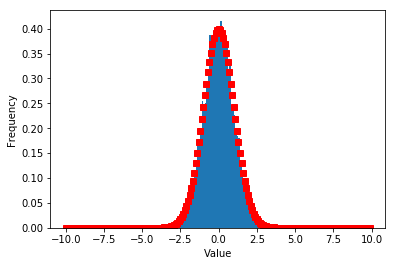

In [7]:
# sampling from normal using acceptance-rejection with prev result
def normal(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-np.power(x, 2)/2) # compute the normal pdf at x

def mc_normal(n):
    l = []
    c = 1
    i = 0
    while i < n:
        y = np.random.uniform(0, 1) #
        z = -np.log(1-y) # sampled from Y
        fz = normal(z) # f(z)
        gz = exp(z) # g(z)
        u = np.random.uniform(0, 1)
        if u < fz/(c*gz): # accept with this probability
            v = np.random.uniform(0, 1)
            if v < 0.5: # accept z with probability 0.5
                l.append(z)
            else: # accept -z with probability 0.5
                l.append(-z)
            i += 1
    t = np.arange(-10, 10, 0.1) # generate values from -10 to 10 with spacing 0.1
    plt.plot(t, normal(t), "rs") # draw normal pdf(values from above)
    plt.hist(l, bins = t, normed = True) # generate normalized histogram
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

mc_normal(10000)

### Slice sampling
Slice sampling is a Markov Chain Monte Carlo (MCMC) sampling method. The major difference between it and rejection sampling is that the samples we draw using rejection sampling are mutually independent, while samples we draw using slice sampling are not. 

Suppose we want to generate samples from a distribution with density $f(x)$. The algorithm for slice sampling is as follows:

(1) Choose a starting value $x$

(2) Generate $u \sim U(0, f(x))$

(3) Sample $x' \sim U(a, b)$ where $f(a) = f(b) = u$, let $x = x'$ and go back to (2)

Intuitively, we first choose a starting point with x-intercept $x'$. We then choose a height smaller than $f(x')$ and draw a horizontal line accross it, randomly move to a point on the line, and fix that point as the new starting point. When the sample size large enough, this process will be equivalent to sampling uniformly from the area under the curve $f(x)$, which gives us a way to sample from $X$ (there is a formall proof: the sequence of selected $x$ values is a Markov chain, but will not be presented in this tutorial). 

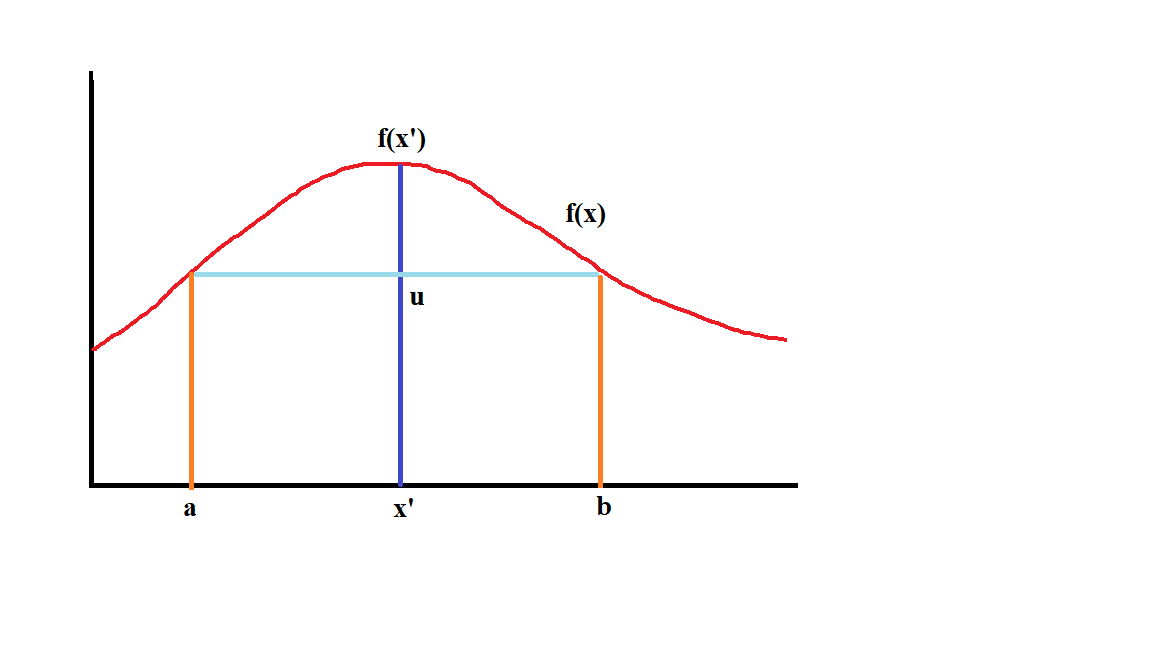

In [10]:
Image(filename = "slice.png", width=500, height=500)

Here is an example of slice sampling where $X \sim N(0, 1)$ with density $f(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$ for $x \in \mathbb{R}$. In this case, we can explicitly compute the inverse function for the normal pdf as $f^{-1}(x) = \pm \sqrt{-2 \cdot log(x \cdot \sqrt{2\pi})}$, and choose $a, b$ correspondingly. The code is as follows:

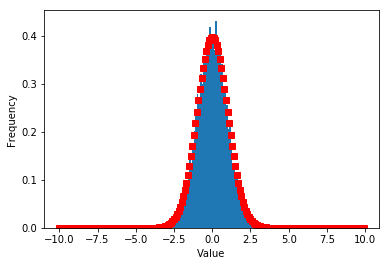

In [30]:
def normal_inv(x):
    return np.sqrt(-2 * np.log(x * np.sqrt(2*np.pi))) # inverse for normal pdf

def mc_slice(n):
    l = []
    x = 0
    for i in range(n):
        y = normal(x) # normal pdf at x
        u = np.random.uniform(0, y)
        z = normal_inv(u)
        x = np.random.uniform(-z, z) # choose new x
        l.append(x)
    t = np.arange(-10, 10, 0.1)
    plt.plot(t, normal(t), "rs")
    plt.hist(l, bins = t, normed = True)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

mc_slice(10000)

## Remark
I decided to make a tutorial on Monte Carlo methods because the idea behind is interesting and that they are quite useful. More information about this topic can be found on Wikipedia, some lecture pdfs for stats/cs courses, and some private blogs. 

Some helpful links:
Rejection sampling: Wikipedia
Slice sampling:
https://wiseodd.github.io/techblog/2015/10/24/slice-sampling/